# Exercise-5: Deeper CNN Training on SVHN

Train a controlled deep convolutional neural network (CNN) on a subset of the SVHN dataset.
Set random seeds to 42. Load and preprocess SVHN.
Build the network using the following configuration:

**Data Preparation**
- Load SVHN and normalize pixel values to [0, 1]
- Use only the first 2000 training samples and first 500 test samples
- Input shape: 32 × 32 × 3

**CNN Architecture**
- Conv2D: 32 filters, 3×3 kernel, ReLU activation
- Conv2D: 32 filters, 3×3 kernel, ReLU activation
- MaxPooling2D: 2×2
- Conv2D: 64 filters, 3×3 kernel, ReLU activation
- Conv2D: 64 filters, 3×3 kernel, ReLU activation
- MaxPooling2D: 2×2
- Flatten
- Dense: 256 neurons, ReLU activation
- Dropout: 0.3
- Output layer: 10 neurons with softmax activation

**Training Configuration**
- Optimizer: Adam, with learning rate = 0.001
- Loss: sparse_categorical_crossentropy
- Epochs: 15
- Batch size: 32

## Data Preparation
### The Street View House Numbers (SVHN) Dataset
- Contains over 600,000 labeled digits from real-world images
- 10 classes (digits 0-9), 0 has label 10
from tensorflow.keras.datasets import svhn

Number of training examples: 2000
tfds.core.DatasetInfo(
    name='svhn_cropped',
    full_name='svhn_cropped/3.1.0',
    description="""
    The Street View House Numbers (SVHN) Dataset is an image digit recognition
    dataset of over 600,000 digit images coming from real world data. Images are
    cropped to 32x32.
    """,
    homepage='http://ufldl.stanford.edu/housenumbers/',
    data_dir='/Users/arthurborgerthorkildsen/tensorflow_datasets/svhn_cropped/3.1.0',
    file_format=tfrecord,
    download_size=1.47 GiB,
    dataset_size=1.09 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'extra': <SplitInfo num_examples=531131, num_shards=8>,
        'test': <SplitInfo num_examples=26032, num_shards=1>,
  

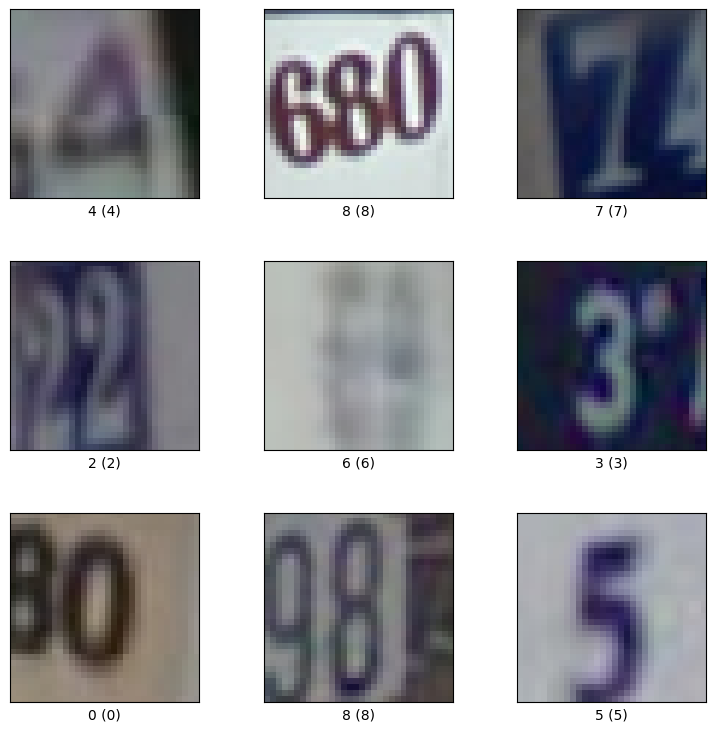

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1865 - loss: 2.2650 - val_accuracy: 0.1840 - val_loss: 2.2519
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1955 - loss: 2.2457 - val_accuracy: 0.1840 - val_loss: 2.2439
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2375 - loss: 2.1446 - val_accuracy: 0.3200 - val_loss: 1.9490
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4325 - loss: 1.6924 - val_accuracy: 0.4860 - val_loss: 1.5737
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6280 - loss: 1.1726 - val_accuracy: 0.6640 - val_loss: 1.1407
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7160 - loss: 0.8877 - val_accuracy: 0.7140 - val_loss: 0.9804
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7625 - loss: 0.7431 - val_accuracy: 0.7200 - val_loss: 0.9261
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7905 - loss: 0.6275 - val_accuracy: 0.7040 - v

In [29]:
# load SVHN dataset
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Construct a tf.data.Dataset, load only the first 2000 training and 500 test examples
ds_train, info = tfds.load('svhn_cropped', split='train[:2000]', as_supervised=True, with_info=True)
# Check the number of examples in the training dataset
print("Number of training examples:", ds_train.cardinality().numpy())
print(info) 
ds_test = tfds.load('svhn_cropped', split='test[:500]', as_supervised=True)
print("Number of test examples:", ds_test.cardinality().numpy())
# print the class names
print("Class names:", info.features['label'].names)

# Display some examples from the dataset
tfds.show_examples(ds_train, info, rows=3, cols=3);

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')]
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(ds_train, epochs=15,batch_size=32, validation_data=ds_test, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test accuracy: {test_accuracy:.4f}')



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


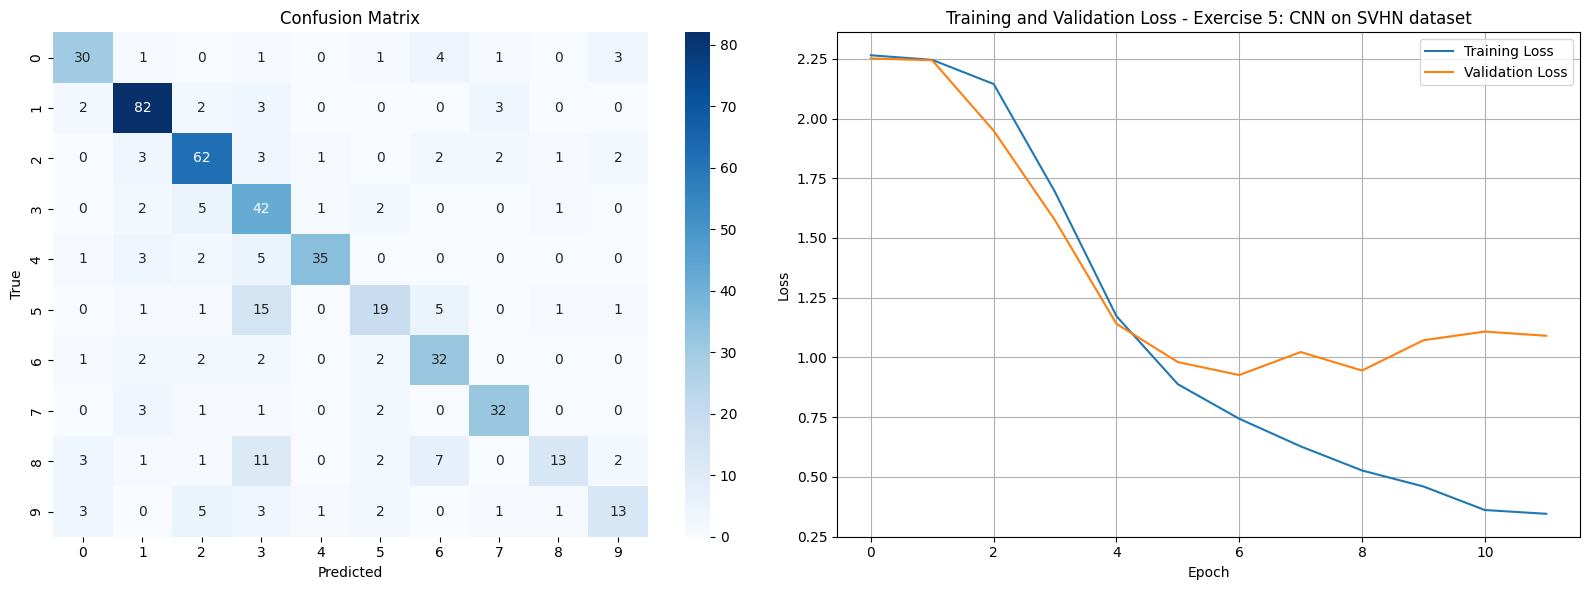

In [33]:
from helper import plot_model_evaluation
import numpy as np

# Extract x_test and y_test as numpy arrays from the dataset
x_test_list = []
y_test_list = []
for images, labels in ds_test:
    x_test_list.append(images.numpy())
    y_test_list.append(labels.numpy())

x_test = np.concatenate(x_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

plot_model_evaluation(model, x_test, y_test, history, exercise_title='Exercise 5: CNN on SVHN dataset')